# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import weathapi_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Print the city count to confirm sufficient count
len(cities)
#cities

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weathapi_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=7d4868b633f3323ee26c322ea2c5a1dc&units=imperial&q='

In [6]:
# set up lists to hold response info
cit = []
lat = []
lng = []
temp = []
humid = []
MaxT = []
cloud = []
wind = []
country = []
date = []
city_count = 0

# Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# Get the temperature from the response
#pprint(weather_json)
for city1 in cities:
    city_count += 1
    try:
        response = requests.get(query_url + city1).json()
        temp_lat = response['coord']['lat']
        temp_lng = response['coord']['lon']
        temp_temp = response['main']['temp']
        temp_humid = response['main']['humidity']
        temp_MaxT = response['main']['temp_max']
        temp_cloud = response['clouds']['all']
        temp_wind = response['wind']['speed']
        temp_country = response['sys']['country']
        temp_date = response['dt']
        temp_cit = response['name']
        lat.append(temp_lat)
        lng.append(temp_lng)
        temp.append(temp_temp) 
        humid.append(temp_humid)
        MaxT.append(temp_MaxT)
        cloud.append(temp_cloud)
        wind.append(temp_wind)
        country.append(temp_country)
        date.append(temp_date)
        cit.append(temp_cit)
        print(f"The temperature for: {city_count}. {city1} is {response['main']['temp']}")
    except:
        print(f"No information available for {city1}")

The temperature for: 1. nome is 49.87
The temperature for: 2. klaksvik is 53.6
The temperature for: 3. hambantota is 86
The temperature for: 4. dublin is 55.69
The temperature for: 5. bengkulu is 77.94
The temperature for: 6. cape town is 64.36
The temperature for: 7. santa helena de goias is 83.1
The temperature for: 8. ushuaia is 37.4
The temperature for: 9. shimoda is 75.99
The temperature for: 10. rikitea is 67.6
The temperature for: 11. skjervoy is 51.8
The temperature for: 12. busselton is 51.4
The temperature for: 13. thanh hoa is 81.03
The temperature for: 14. kangaba is 81.45
The temperature for: 15. nemuro is 67.55
The temperature for: 16. hermanus is 64
The temperature for: 17. ilulissat is 42.8
The temperature for: 18. westport is 69.17
The temperature for: 19. port alfred is 68.4
The temperature for: 20. norman wells is 41
The temperature for: 21. isangel is 71.49
The temperature for: 22. tuktoyaktuk is 39.2
The temperature for: 23. sinnamary is 86.32
The temperature for: 

The temperature for: 193. comodoro rivadavia is 48.2
The temperature for: 194. rincon is 84.31
The temperature for: 195. fairbanks is 49.01
The temperature for: 196. tura is 76.68
The temperature for: 197. kouango is 86.23
The temperature for: 198. hermiston is 53.46
The temperature for: 199. naryan-mar is 59.54
The temperature for: 200. cabinda is 77.79
The temperature for: 201. ventspils is 66.2
The temperature for: 202. tayshet is 52.75
The temperature for: 203. diffa is 92.86
The temperature for: 204. yinchuan is 80.17
The temperature for: 205. tuatapere is 45
The temperature for: 206. sisimiut is 50.41
The temperature for: 207. vikarabad is 74.98
The temperature for: 208. grand gaube is 73
The temperature for: 209. riyadh is 105.8
The temperature for: 210. ladario is 88.38
The temperature for: 211. suhbaatar is 56.79
The temperature for: 212. lagos is 89.6
No information available for sorvag
The temperature for: 214. pudozh is 62.85
The temperature for: 215. araouane is 102.09
The

The temperature for: 382. dois vizinhos is 72
The temperature for: 383. vaitape is 77.58
The temperature for: 384. ancud is 43.3
No information available for louisbourg
The temperature for: 386. bang saphan is 82.4
No information available for dolbeau
The temperature for: 388. kikwit is 77.07
The temperature for: 389. meulaboh is 80.49
The temperature for: 390. alofi is 64.4
The temperature for: 391. lensk is 49.6
The temperature for: 392. mananjary is 74.05
No information available for vaitupu
The temperature for: 394. nakhon thai is 86
The temperature for: 395. broome is 67.89
The temperature for: 396. imeni poliny osipenko is 55.31
The temperature for: 397. formosa is 84.2
The temperature for: 398. pyapon is 80.38
The temperature for: 399. nantucket is 66.11
The temperature for: 400. rawson is 55.44
The temperature for: 401. vila franca do campo is 78.8
The temperature for: 402. revelstoke is 50
The temperature for: 403. saratoga springs is 57
The temperature for: 404. gat is 84.94


The temperature for: 572. tortosa is 84.31
The temperature for: 573. petropavlovka is 55.9
The temperature for: 574. olinda is 82.4
The temperature for: 575. umm lajj is 89.44
The temperature for: 576. presidencia roque saenz pena is 81.97
The temperature for: 577. takoradi is 79.11
No information available for sug-aksy
The temperature for: 579. qingdao is 74.48
The temperature for: 580. ryotsu is 78.8
No information available for chagda
The temperature for: 582. sungurlu is 87.93
The temperature for: 583. mayumba is 76.87
The temperature for: 584. loukhi is 52.95
The temperature for: 585. san quintin is 73.76
The temperature for: 586. timoteo is 80.15
The temperature for: 587. port macquarie is 43.93
The temperature for: 588. kamariotissa is 88.07
The temperature for: 589. san vicente is 79.27
The temperature for: 590. bonavista is 60.01
The temperature for: 591. kearney is 69.48
The temperature for: 592. da nang is 84.2
The temperature for: 593. coos bay is 51.76
The temperature for:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Verify length of arrays
print(len(cit))
print(len(lat))
print(len(lng))
print(len(temp))
print(len(humid))
print(len(MaxT))
print(len(cloud))
print(len(wind))
print(len(country))
print(len(date))

557
557
557
557
557
557
557
557
557
557


In [8]:
weatherdict = {
        "City": cit,
        "Lat": lat,
        "Lng": lng,
        "Temp": temp,
        "Humidity": humid,
        "Max Temp": MaxT,
        "Cloudiness": cloud,
        "Wind Speed": wind,
        "Country": country,
        "Date": date
}

In [9]:
weather_data = pd.DataFrame(weatherdict)
weather_data.head()

,City,Lat,Lng,Temp,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,Nome,64.50,-165.41,49.87,76,51.80,20,7.63,US,1598537180
1,Klaksvík,62.23,-6.59,53.60,87,53.60,39,10.29,FO,1598537180
2,Hambantota,6.12,81.12,86.00,74,86.00,20,10.29,LK,1598537180
3,Dublin,37.70,-121.94,55.69,82,59.00,90,3.36,US,1598537180
4,Bengkulu,-3.80,102.27,77.94,82,77.94,3,6.58,ID,1598537180


In [10]:
# Output to CSV file
weather_data.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[(weather_data["Humidity"] > 100)]

,City,Lat,Lng,Temp,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# NO CITIES HAVE HUMIDITY > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
Adjlat_df = weather_data.copy()
Adjlat_df['Lat'] = Adjlat_df["Lat"].abs()
Adjlat_df.head()

,City,Lat,Lng,Temp,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,Nome,64.50,-165.41,49.87,76,51.80,20,7.63,US,1598537180
1,Klaksvík,62.23,-6.59,53.60,87,53.60,39,10.29,FO,1598537180
2,Hambantota,6.12,81.12,86.00,74,86.00,20,10.29,LK,1598537180
3,Dublin,37.70,-121.94,55.69,82,59.00,90,3.36,US,1598537180
4,Bengkulu,3.80,102.27,77.94,82,77.94,3,6.58,ID,1598537180


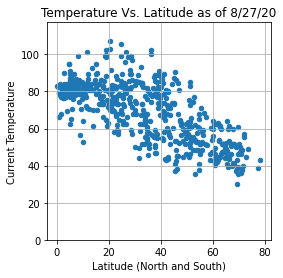

In [16]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Temp", grid=True, figsize=(4,4),
              title="Temperature Vs. Latitude as of 8/27/20")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Temperature")
plt.ylim(0, max(Adjlat_df["Temp"])+10)
plt.savefig("Temp.png", format="png")
plt.show()

In [17]:
# The above code is comparing what currrent temperatures are at various latitudes.  I used the .abs() function to
#   make the data consistent in both the northern and southern hemispheres.  The data shows a distinct decreasing trend as
#   you go further away from the equator.

## Latitude vs. Humidity Plot

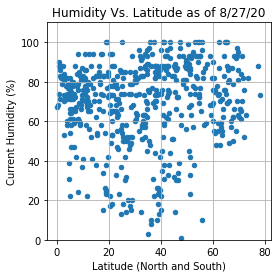

In [18]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(4,4),
              title="Humidity Vs. Latitude as of 8/27/20")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Humidity (%)")
plt.ylim(0, max(Adjlat_df["Humidity"])+10)
plt.savefig("Humidity.png", format="png")
plt.show()

In [19]:
# The above code is comparing what currrent humidity are at various latitudes.  I used the .abs() function to
#   make the data consistent in both the northern and southern hemispheres.  The data appears to show more sporadic humidity
#   readings at lower altitudes, with slightly more consistent readings in the higher latitudes.

## Latitude vs. Cloudiness Plot

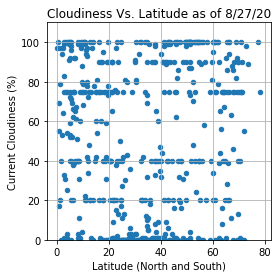

In [20]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(4,4),
              title="Cloudiness Vs. Latitude as of 8/27/20")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Cloudiness (%)")
plt.ylim(0, max(Adjlat_df["Cloudiness"])+10)
plt.savefig("Cloudy.png", format="png")
plt.show()

In [21]:
# The above code is comparing what currrent cloudiness at various latitudes.  I used the .abs() function to
#   make the data consistent in both the northern and southern hemispheres.  The data doesn't appear to have any correlation
#   between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

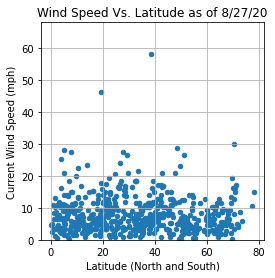

In [22]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(4,4),
              title="Wind Speed Vs. Latitude as of 8/27/20")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Wind Speed (mph)")
plt.ylim(0, max(Adjlat_df["Wind Speed"])+10)
plt.savefig("Wind.png", format="png")
plt.show()

In [23]:
# The above code is comparing current wind speeds at various latitudes.  I used the .abs() function to make the data more
#   consistent in both the northern and southern hemispheres.
#There appears to be a slight decreasing trend in wind speed as you go further from the equator.

## Linear Regression

In [24]:
#Break main dataframe into northern and southern dataframes
north_df = weather_data.loc[(weather_data["Lat"] >= 0)]
south_df = weather_data.loc[(weather_data["Lat"] < 0)]
north_df = north_df.reset_index()
south_df = south_df.reset_index()
#north_df.head()
#south_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6038224328554874
y = -0.63x + 94.57


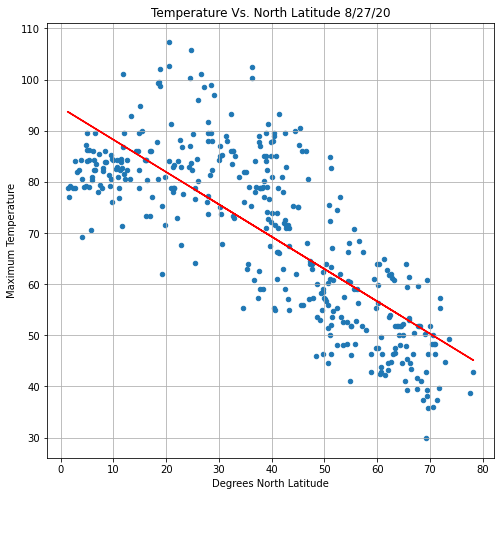

In [25]:
#Calculate linear regression model for north latitude and maximum temperature
Latitude = north_df["Lat"]
TempMax = north_df["Max Temp"]
north_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title="Temperature Vs. North Latitude 8/27/20")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Maximum Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, TempMax)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
# The above linear regression model shows a moderate correlation between latitude and maximum temperature.
# Above 50 degrees north latitude the maximum temperatures appear to be more consisitent.

The r-squared is: 0.6427820035063415
y = 0.79x + 85.57


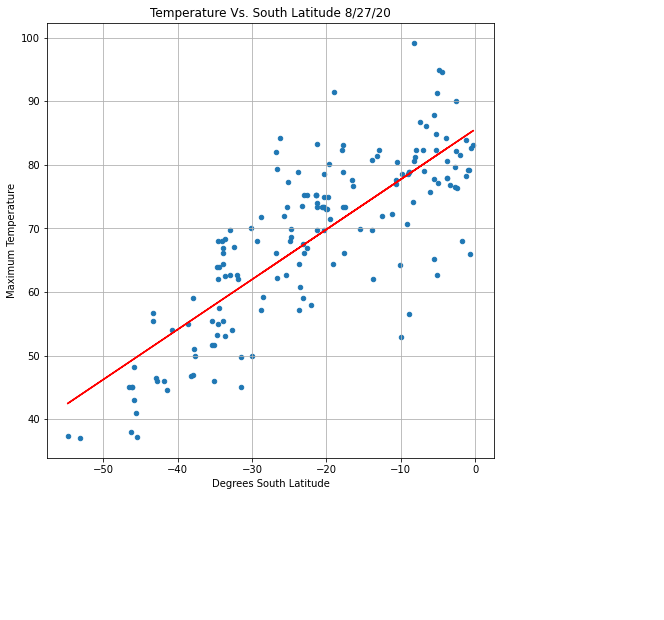

In [27]:
#Calculate linear regression model for south latitude and maximum temperature
SLatitude = south_df["Lat"]
STempMax = south_df["Max Temp"]
south_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title="Temperature Vs. South Latitude 8/27/20")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Maximum Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, STempMax)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [28]:
#There appears to be a stronger correlation in the southern hemisphere than the northern hemisphere as far as correlating
#  latitude with maximum temperature.   There also appear to be some more variability in measurements between 0 and 10
#  degrees south latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006327958595638356
y = 0.09x + 66.69


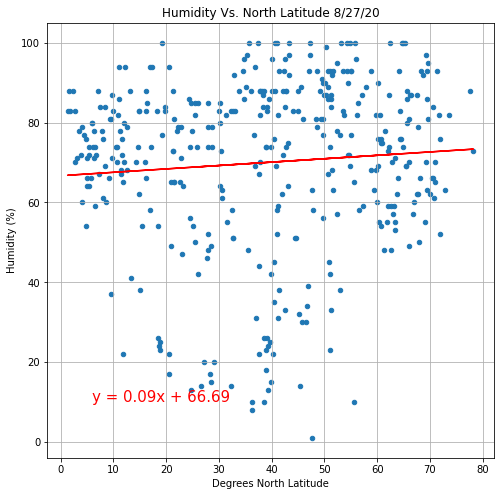

In [29]:
#Calculate linear regression model for north latitude and humidity
Humidity = north_df["Humidity"]
north_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="Humidity Vs. North Latitude 8/27/20")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [30]:
#There appears to be minimal corrrelation between humidity and latitude though the lowest instances in humidity are between
#  20 and 60 degrees north latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000739732335218245
y = -0.04x + 65.94


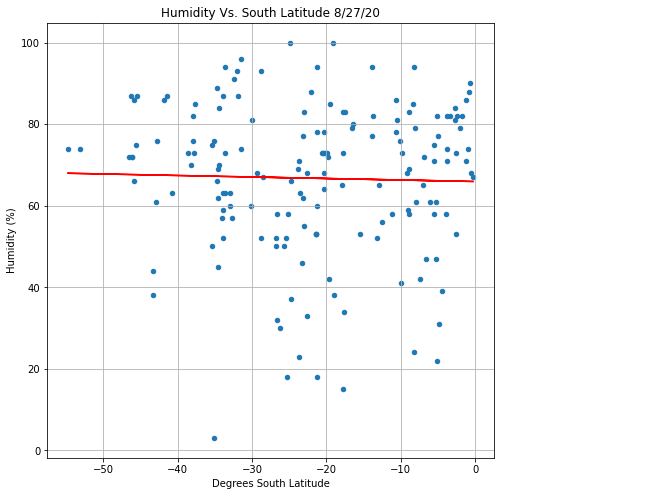

In [31]:
#Calculate linear regression model for south latitude and humidity
SHumidity = south_df["Humidity"]
south_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="Humidity Vs. South Latitude 8/27/20")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, SHumidity)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [32]:
#There appears to be minimal corrrelation between humidity and latitude though the lowest instances in humidity are between
#  0 and 30 degrees south latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005488721690361938
y = 0.14x + 44.31


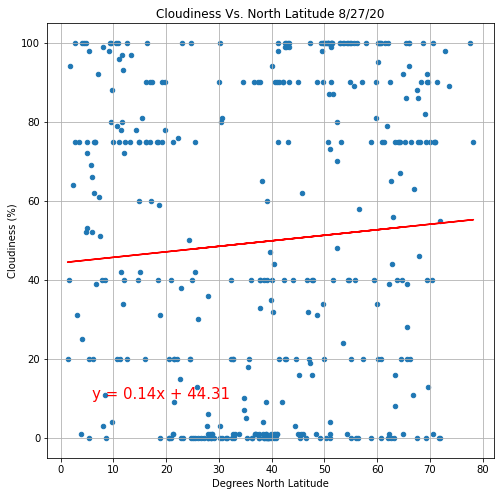

In [33]:
#Calculate linear regression model for north latitude and cloudiness
Cloudiness = north_df["Cloudiness"]
north_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="Cloudiness Vs. North Latitude 8/27/20")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [34]:
# There appears to be slight correlation between cloud cover and latitude; measurements are sporadic at every latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.027299891076444486
y = 0.48x + 54.45


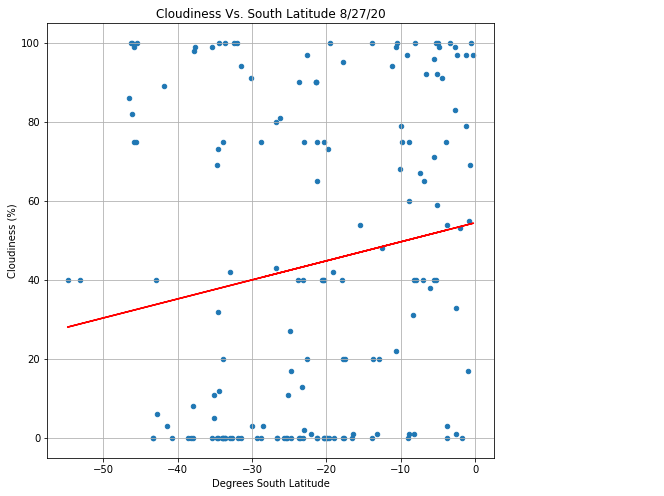

In [35]:
#Calculate linear regression model for north latitude and cloudiness
SCloudiness = south_df["Cloudiness"]
south_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="Cloudiness Vs. South Latitude 8/27/20")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, SCloudiness)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [37]:
# There appears to be slight correlation between cloud cover and south latitude; measurements are sporadic at every
    # latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0022351552720300777
y = -0.01x + 8.39


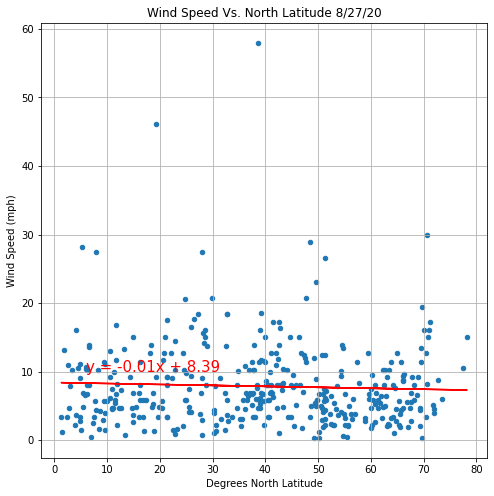

In [38]:
#Calculate linear regression model for north latitude and wind speed
Windspeed = north_df["Wind Speed"]
north_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="Wind Speed Vs. North Latitude 8/27/20")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Windspeed)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [39]:
# There appears to be little to no correlation between wind speed and latitude; measurements are sporadic at every latitude
#  though the highest wind speeds are between 20 and 50 degrees north latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00787722015729592
y = -0.04x + 7.91


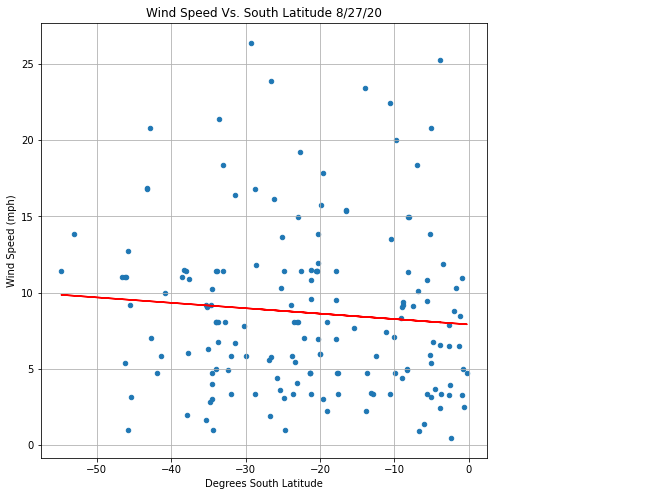

In [40]:
#Calculate linear regression model for south latitude and wind speed
SWindspeed = south_df["Wind Speed"]
south_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="Wind Speed Vs. South Latitude 8/27/20")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, SWindspeed)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [42]:
# There appears to be slight correlation between wind speed and latitude; measurements are sporadic at every latitude

In [ ]:
#FINAL OBSERVATIONS
    #In both hemishpheres, temperature do slightly trend downwards the further north or south you go of the equator.
    #There are slight trends for wind speed and cloudiness as you mover further north or south of the equator.
    #There is minimal correlation between humidity and distance from the equator.